[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_14_Arvores_de_Decisao.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_14_Arvores_de_Decisao.ipynb)

# Árvores de Decisão (*Decision Trees*)

**Objetivos**: Aprender o que é Árvores de Decisão usando a biblioteca `Scikit-Learn`.

## O que é uma Árvore de Decisão?

Uma árvore de decisão é uma estrutura do tipo fluxograma na qual cada nó interno representa um "teste" em um atributo (por exemplo, se um lançamento de moeda aparece cara ou coroa), cada ramo representa o resultado do teste e cada nó folha representa um rótulo de classe (decisão tomada após o cálculo de todos os atributos). Os caminhos da raiz para a folha representam regras de classificação.

## Elementos de uma Árvore de Decisão

* **Árvore** (*Tree*): Mapeamento de uma decisão composta por nós e folhas
* **Nó de Decisão** (*Node*): Quando um nó se divide em outros sub-nós, ele é chamado de nó de decisão
* **Raiz** (*Root*): Primeiro nó de decisão
* **Folha** (*Leaf*): Os nós não divididos são chamados de nó folha

<img src="images/arvore-decisao.jpg" alt="arvore-decisao" width="300"/>

## Impureza de Nós - Classificação

* Um nó é puro quando todas as observações que ele aplica decisões são da mesma classe.
* Quanto menor mais puro o nó
* Mensurado por
	* Índice de Gini: Menor custo computacional
	* Entropia: Maior custo computacional
	* Na maioria das vezes não faz diferença Gini ou Entropia.
		* Mas quando há diferença, Entropia tende a gerar árvores mais equilibradas
        
## Impureza de Nós - Regressão

* Um nó é puro quando todas as observações que ele aplica decisões possuem erro zero.
* Quanto menor mais puro o nó
* Mensurado por
	* MSE: Maior punição para erros "grosseiros"
	* MAE: Punição igual para todos os erros

## Classificação e Regressão

* Classificação: [`sklearn.tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* Regressão: [`sklearn.tree.DecisionTreeRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

## Hiperparâmetros

* **Profundidade Máxima das Árvores**: Número máximo de nós que devem existir em uma dada árvore
* **Quantidade Mínima de Observações para uma Decisão**: Mínimo de observações que um nó deve ter para ser separado

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [1]:
# import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [2]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


### Árvore de Classificação
Usar a função do Scikit-Learn [`sklearn.tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### Argumentos:
* `criterion` - `str` - Critério de Impureza (Gini ou Entropia)
    * `'gini'` - padrão
    * `'entropy'`
* `max_depth` - `int` - Profundidade Máxima da Árvore
* `min_samples_split` - `int` ou `float` - padrão `2` - Quantidade Mínima de Observações para uma Decisão
* `min_samples_leaf` - `int` ou `float` - Quantidade Mínima de Observações para que um Nó vire Folha (não tenha mais outros nós abaixo)
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

### Árvore de Regressão
Usar a função do Scikit-Learn [`sklearn.tree.DecisionTreeRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

#### Argumentos:
* `criterion` - `str` - Critério de Impureza (MSE ou MAE)
    * `'mse'` - padrão
    * `'mae'`
* `max_depth` - `int` - Profundidade Máxima da Árvore
* `min_samples_split` - `int` ou `float` - padrão `2` - Quantidade Mínima de Observações para uma Decisão
* `min_samples_leaf` - `int` ou `float` - Quantidade Mínima de Observações para que um Nó vire Folha (não tenha mais outros nós abaixo)
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=20, random_state=123)

### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

> Obs: *Support Vector Machines* acurácias: 0.79 Treino e 0.75 Teste

In [4]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.79

 ---------------------------

Acurácia de Teste: 0.79


### Plotando a Árvore

Usar a função do Scikit-Learn [`sklearn.tree.plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Usar junto com o `matplotlib.pyplot`.

Lembrando nossos features

* `X[0]` = `'pclass'`
* `X[1]` = `'female'`
* `X[2]` = `'age'`
* `X[3]` = `'fare'`

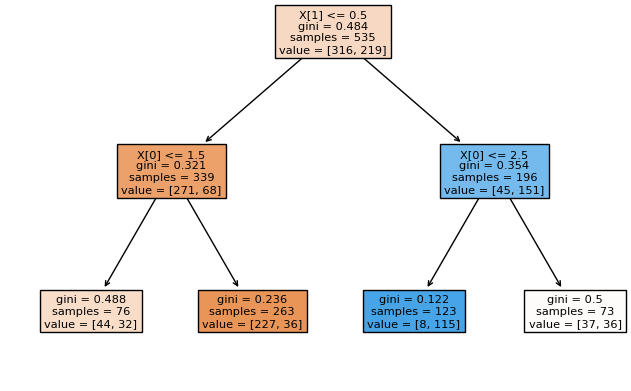

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.show()

## Atividade - Árvores de Decisão com o dataset [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Setosa, Virginica e Versicolor). Quatro características foram medidas em cada amostra (cm):

* $N = 150$
* Atributos: 4
    * `sepal length (cm)` - Cumprimento da Sépala
    * `sepal width (cm)` - Largura da Sépala
    * `petal length (cm)` - Cumprimento da Pétala
    * `petal width (cm)` - Largua da Sépala
* Variável dependente: Tipo de espécie de Iris
    * `0` - Setosa
    * `1` - Virginica
    * `2` - Versicolor 

* Achar a acurácia do modelo para os dados de teste

>Obs: usar `test_size = 0.25` e `random_state = 123`

<img src="images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

In [ ]:
print('Nomes dos Atributos: ', iris['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')